# Boosted Decision Trees - exercise 01
 >__Created__:  2018 Harrison B. Prosper


### Exercise
  1. Build a shallow or deep tree, using __AdaBoostClassifier__, to discriminate between the good wine and bad based on the chemical properties of wine.

In [42]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [43]:
# update fonts
FONTSIZE = 32
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 28}

mp.rc('font', **font)

### Load data into memory

In [44]:
wine = pd.read_csv('datasets/whitewine.csv')
names= wine.keys().tolist()
print names
wine[0:10]

['acetic', 'citric', 'suger', 'salt', 'SO2free', 'SO2tota', 'pH', 'sulfate', 'alcohol', 'quality']


,acetic,citric,suger,salt,SO2free,SO2tota,pH,sulfate,alcohol,quality
0,0.180,0.33,1.4,0.029,35.0,138.0,3.36,0.60,11.5,0.7
1,0.685,0.21,9.5,0.070,33.0,172.0,3.00,0.55,9.1,0.6
2,0.210,0.28,2.4,0.056,49.0,159.0,3.02,0.47,8.8,0.8
3,0.250,0.13,17.2,0.036,49.0,219.0,2.96,0.46,9.7,0.5
4,0.420,0.23,8.8,0.054,42.0,215.0,3.02,0.58,9.2,0.6
5,0.240,0.15,7.1,0.043,32.0,134.0,3.24,0.48,9.9,0.6
6,0.250,0.37,1.0,0.043,10.0,80.0,3.08,0.38,11.4,0.5
7,0.140,0.32,1.1,0.022,48.0,116.0,3.04,0.67,10.0,0.6
8,0.310,0.26,7.3,0.050,37.0,157.0,3.09,0.43,9.0,0.5
9,0.410,0.18,3.5,0.027,23.0,109.0,3.34,0.54,12.8,0.8


### Add a target column based on wine quality 

In [45]:
THRESHOLD = 0.6

select = wine['quality'] > THRESHOLD
wine['target'] = np.where(wine['quality'] >= 0.6, 1,  0)

ngood = np.sum(wine['target'])
nbad  = len(wine) - ngood

print 'number of good wines %d' % ngood
print 'number of bad  wines %d' % nbad
wine[:10]

number of good wines 3258
number of bad  wines 1640


,acetic,citric,suger,salt,SO2free,SO2tota,pH,sulfate,alcohol,quality,target
0,0.180,0.33,1.4,0.029,35.0,138.0,3.36,0.60,11.5,0.7,1
1,0.685,0.21,9.5,0.070,33.0,172.0,3.00,0.55,9.1,0.6,1
2,0.210,0.28,2.4,0.056,49.0,159.0,3.02,0.47,8.8,0.8,1
3,0.250,0.13,17.2,0.036,49.0,219.0,2.96,0.46,9.7,0.5,0
4,0.420,0.23,8.8,0.054,42.0,215.0,3.02,0.58,9.2,0.6,1
5,0.240,0.15,7.1,0.043,32.0,134.0,3.24,0.48,9.9,0.6,1
6,0.250,0.37,1.0,0.043,10.0,80.0,3.08,0.38,11.4,0.5,0
7,0.140,0.32,1.1,0.022,48.0,116.0,3.04,0.67,10.0,0.6,1
8,0.310,0.26,7.3,0.050,37.0,157.0,3.09,0.43,9.0,0.5,0
9,0.410,0.18,3.5,0.027,23.0,109.0,3.34,0.54,12.8,0.8,1


### Split into testing and training data samples

In [46]:
test_fraction = 0.20
train_data, test_data = train_test_split(wine, test_size=test_fraction)
print train_data.shape, test_data.shape

(3918, 11) (980, 11)


### Prepare data for training/testing

In [47]:
def standardize_data(train_data, test_data, names):
    scaler  = StandardScaler()
    scaler.fit(train_data[names])
    
    X_train = scaler.transform(train_data[names])
    y_train = train_data['target']
    
    X_test  = scaler.transform(test_data[names])
    y_test  = test_data['target']
    return (X_train, X_test, y_train, y_test, scaler)

In [60]:
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, 
                                                            ['SO2tota', 'alcohol'])
X_train[0:5]

array([[ 0.16207845,  1.30900376],
       [ 0.25624317,  0.24912516],
       [ 1.78641995, -1.05534081],
       [ 0.98601979,  0.16759604],
       [ 1.90412586, -1.05534081]])

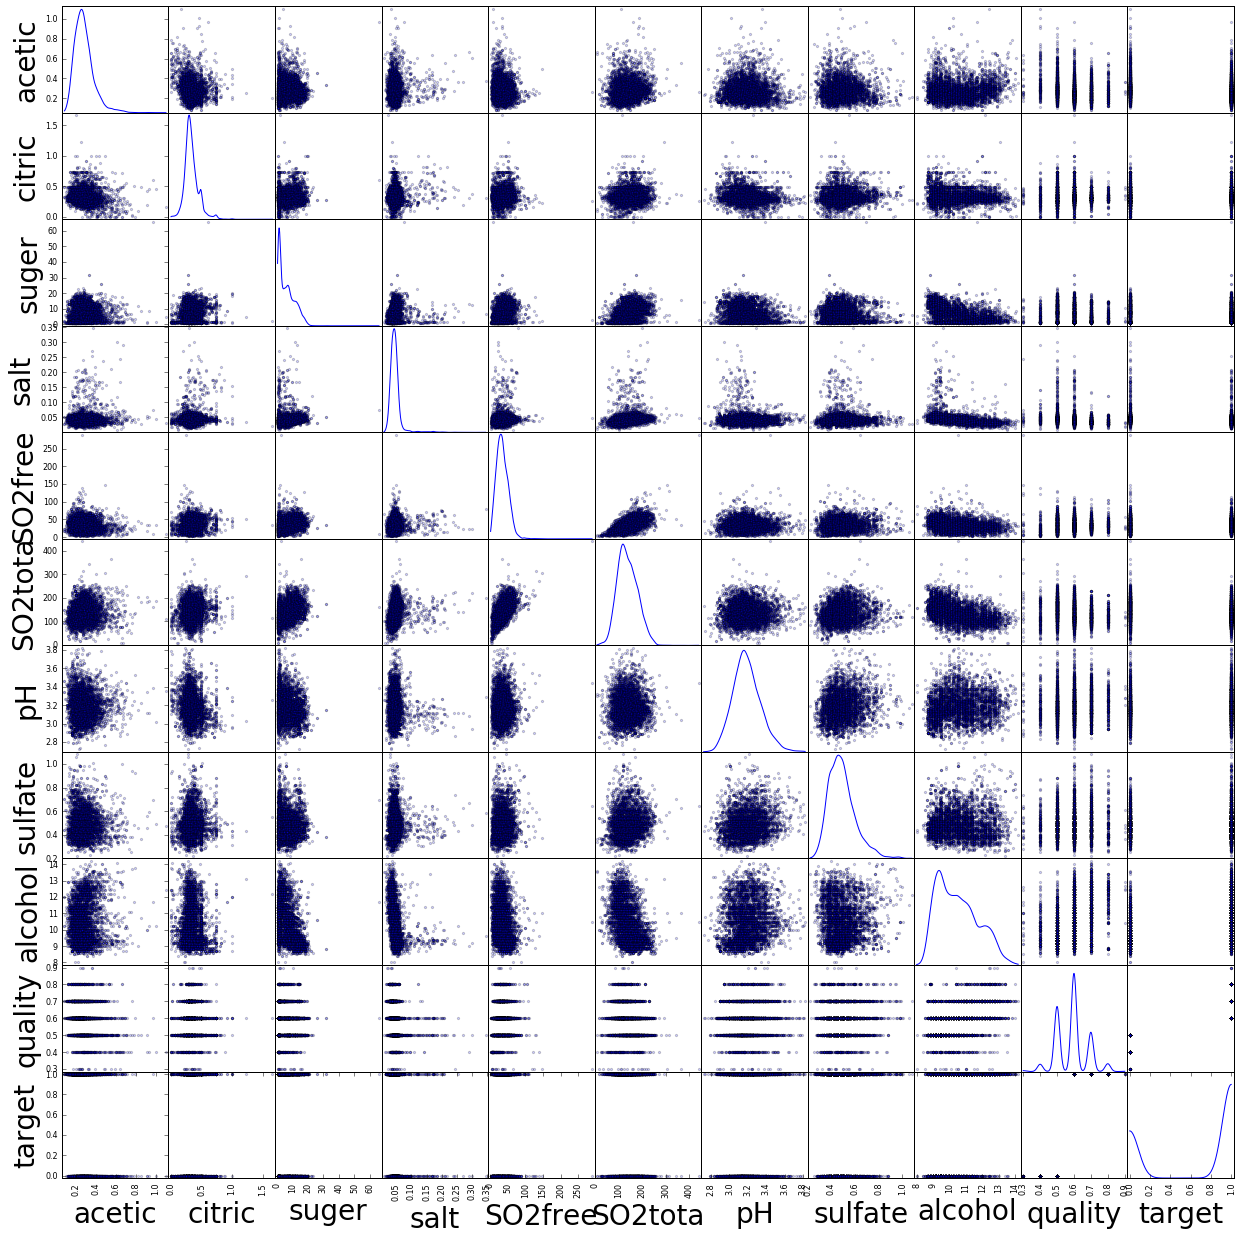

In [61]:
pd.scatter_matrix(wine, alpha=0.2, figsize=(21, 21), diagonal='kde')
plt.show()

### Train classifier

In [67]:
dt  = DecisionTreeClassifier(max_depth=2,
                             min_samples_leaf=20)

ada = AdaBoostClassifier(dt, n_estimators=500, random_state=1)

print "*** TRAINING ***"
ada.fit(X_train, y_train)

print("Training set score: %f" % ada.score(X_train, y_train))      
print("Test set score:     %f" % ada.score(X_test,  y_test))

filename = 'wine.pkl'
print "save to %s" % filename
joblib.dump(ada, filename)

*** TRAINING ***
Training set score: 0.793517
Test set score:     0.721429
save to wine.pkl


['wine.pkl']

In [105]:
def plotDistribution(ada, X_test, y_test, ftsize=FONTSIZE, fgsize=(16,8)):
    p = ada.predict_proba(X_test)
    
    # set size of figure
    plt.figure(figsize=fgsize)
    plt.hist(p,
             bins=200, 
             color=[(1, 0, 0), (0,1,0)], 
             range=(0.495,0.505), 
             normed=True, 
             label=['bad wine','good wine']);

    pl.legend(fontsize='small') # show legend using specified "label"
    plt.savefig("fig_01_bdt_distribution.png")
    plt.show()

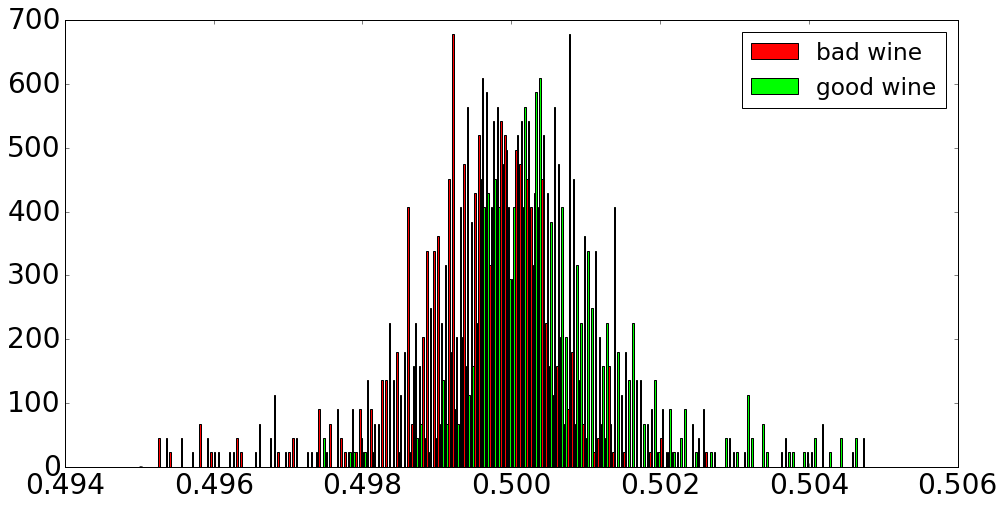

In [98]:
plotDistribution(ada, X_test, y_test)